In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
datos = pd.read_csv('/content/drive/MyDrive/Algoritmo MARS/new_data.csv')

In [12]:
datos.head()

,HORA,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE,PROMEDIO,AÑO
0,1,12.91,10.85,8.99,9.05,6.82,6.11,5.94,6.29,7.31,9.06,9.27,9.24,11.88,2019
1,2,12.27,10.45,8.59,8.81,6.58,6.03,5.89,6.16,7.07,8.79,8.99,8.98,11.36,2019
2,3,11.75,11.54,8.45,8.64,6.41,5.98,5.88,6.12,7.02,8.63,8.77,8.59,11.65,2019
3,4,11.47,11.34,8.32,8.51,6.43,6.13,5.97,6.19,6.99,8.38,8.56,8.53,11.41,2019
4,5,11.47,10.93,8.35,8.54,6.56,6.41,6.17,6.47,6.95,8.41,8.55,8.48,11.20,2019


In [30]:
datos.isna().sum()

HORA          0
ENERO         0
FEBRERO       0
MARZO         0
ABRIL         0
MAYO          0
JUNIO         0
JULIO         0
AGOSTO        0
SEPTIEMBRE    0
OCTUBRE       0
NOVIEMBRE     0
DICIEMBRE     0
PROMEDIO      0
AÑO           0
dtype: int64

In [3]:
#normalizar valores
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
normalizedlist=scaler.fit_transform(datos)

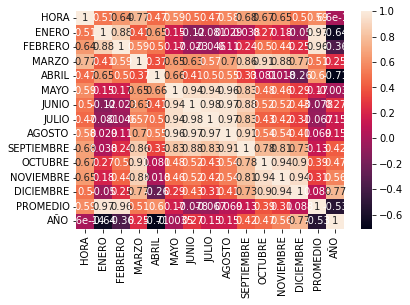

In [31]:
#observar correlaciones
datos.corr()
sn.heatmap(datos.corr(), annot=True)

**CONSTRUCCIÓN DEL MODELO**

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [24]:
# MODELO1 considerando todas las variables meses
X = datos[['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']]
Y = datos['PROMEDIO']

#división del set de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

#crear modelo
model = LinearRegression()
model.fit(X_train, Y_train)
model.intercept_
model.coef_

# predicción 
Y_test_predicted = model.predict(X_test)

#evaluación del modelo
print(mean_squared_error(Y_test, Y_test_predicted))
print(model.score(X_test, Y_test))

1.82011937223438e-05
0.9999875184815316


In [26]:
# MODELO2 considerando las variables con mayor correlación
x = datos[['ENERO','FEBRERO','MARZO','ABRIL']]
y = datos['PROMEDIO']

#división del set de datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

#crear modelo
model2 = LinearRegression()
model2.fit(x_train, y_train)
model2.intercept_
model2.coef_

# predicción 
y_test_predicted = model2.predict(x_test)

#evaluación del modelo
print(mean_squared_error(y_test, y_test_predicted))
print(model2.score(x_test, y_test))

1.1839719435986362e-05
0.9999918808799546


**GRAFICAS**

**Modelo 1**

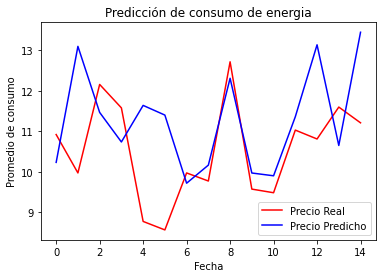

In [27]:
real_data = X_test.iloc[:,-2].values
plt.plot(real_data, color = 'red', label = 'Precio Real')
plt.plot(Y_test_predicted, color = 'blue', label = 'Precio Predicho')
plt.title("Predicción de consumo de energia")
plt.xlabel("Fecha")
plt.ylabel("Promedio de consumo")
plt.legend()
plt.show()

**Modelo 2**

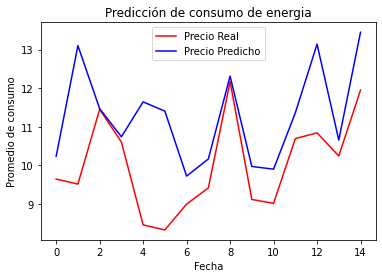

In [29]:
real_data2 = x_test.iloc[:,-2].values
plt.plot(real_data2, color = 'red', label = 'Precio Real')
plt.plot(y_test_predicted, color = 'blue', label = 'Precio Predicho')
plt.title("Predicción de consumo de energia")
plt.xlabel("Fecha")
plt.ylabel("Promedio de consumo")
plt.legend()
plt.show()

Según se observa los resultados de las pruebas (MSE, R-squared) son buenos para los dos modelos, sin embargo, al mostrar los graficos se observa un mejor comportamiento de la predicción realizada por el modelo 2. 

In [32]:
#guadar modelo 
from joblib import dump
dump(model2, 'regre_multiple.joblib') 

['regre_multiple.joblib']